In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import gzip
import pprint
import json
import time
import seaborn as sns
import pandas as pd
import sklearn.datasets
from sklearn import tree, cross_validation, neighbors
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import cluster
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import numpy as np
import itertools as it
%pylab --no-import-all inline
#import pydot


Populating the interactive namespace from numpy and matplotlib


/Users/ashokdeb/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Define your file path
file_path = './'

In [3]:
#Building features from raw data
start_time = time.time()
with gzip.open(file_path+'gamergate.json.gz','rb') as f:
    count = 0
    for line in f:
        status = json.loads(line)
        #pprint.pprint(status)
        raw_series = pd.Series({'followers_count':status['user']['followers_count'], 'listed_count':status['user']['listed_count'], \
                         'statuses_count':status['user']['statuses_count'],'friends_count':status['user']['friends_count'],\
                        'favourites_count':status['user']['favourites_count'],'text_length':len(status['text']),'retweet_count':status['retweet_count']})
        raw_features = pd.DataFrame([raw_series],index =[count])
        if count == 0:
            raw_features.to_csv(file_path+'features.csv')
        if count > 0:
            raw_features.to_csv(file_path+'features.csv', mode='a', header=False)
        count += 1
        if count == 10000: break
print "Feature construction run time: %f min"% ((time.time()-start_time)/60)

Feature construction run time: 0.219796 min


In [5]:
#Loading features from saved file
features = pd.read_csv(file_path+'features.csv')
features = features.drop(['Unnamed: 0'], axis=1)
print "Total users %d"% len(features)
print features.head()

Total users 10000
   favourites_count  followers_count  friends_count  listed_count  \
0              2069              582            414            54   
1               345              886            961             5   
2               359              978            162            10   
3                 1              211              0             2   
4             19890              536            917            16   

   retweet_count  statuses_count  text_length  
0            338           14721          114  
1              0            9240          131  
2              1             949          140  
3              0              56           92  
4           1076            9159          144  


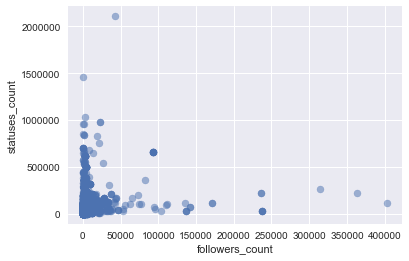

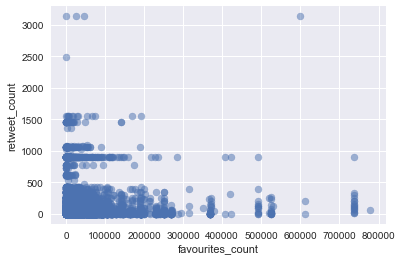

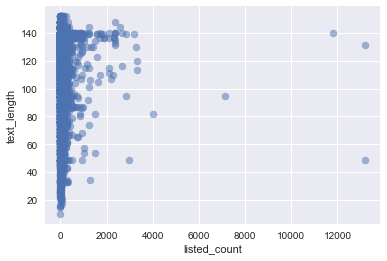

In [6]:
# Drawing Scatter plots to determine K value
def scatterplots(feature1, feature2, label="none"):
    if label == "none":
        plt.scatter(features[feature1], features[feature2], alpha=0.5, s=50)
    else:
        plt.scatter(features[feature1], features[feature2], alpha=0.5, s=50, c=label)
    plt.xlabel(feature1), plt.ylabel(feature2)
    plt.show()
    
scatterplots("followers_count", "statuses_count", label="none")
scatterplots("favourites_count", "retweet_count", label="none")
scatterplots("listed_count", "text_length", label="none")


In [7]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(features)
k_means_label = k_means.labels_

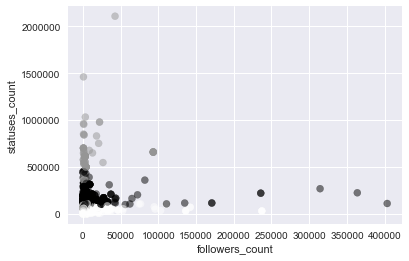

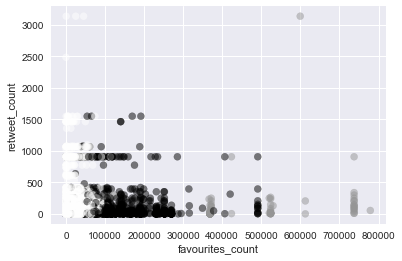

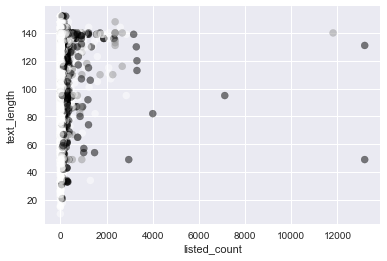

In [8]:
scatterplots("followers_count", "statuses_count", label=k_means_label)
scatterplots("favourites_count", "retweet_count", label=k_means_label)
scatterplots("listed_count", "text_length", label=k_means_label)

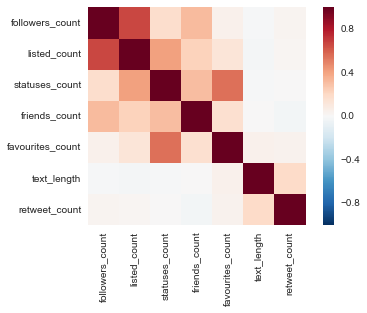

In [9]:
#Heatmap to see innate correlation between featuress
cor = features[['followers_count','listed_count','statuses_count','friends_count','favourites_count', \
                'text_length', 'retweet_count']].corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [10]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

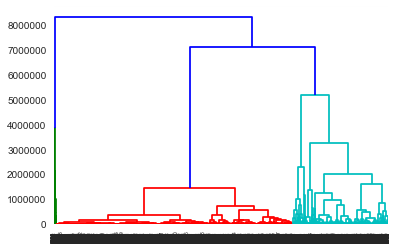

In [11]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(features, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
hc.fit_predict(features)
hc_label = hc.labels_

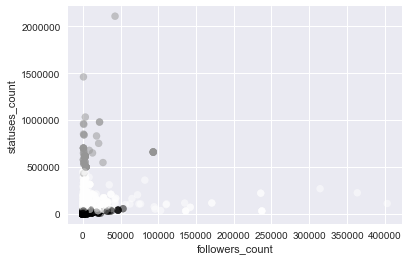

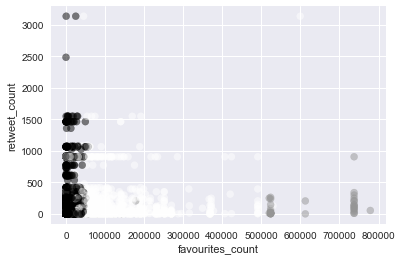

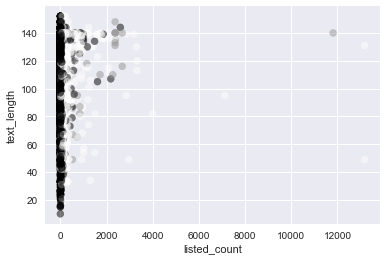

In [12]:
scatterplots("followers_count", "statuses_count", label=hc_label)
scatterplots("favourites_count", "retweet_count", label=hc_label)
scatterplots("listed_count", "text_length", label=hc_label)